In [7]:
from pydap.client import open_url

# URL of the OPeNDAP server hosting the dataset
url = 'https://dap.ceda.ac.uk/thredds/dodsC/neodc/esacci/land_cover/data/pft/v2.0.8/ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-v2.0.8.nc'

# Connect to the dataset, specifying the 'utf-8' charset
dataset = open_url(url, user_charset='utf-8')

# Print the dataset information
print(dataset)



<DatasetType with children 'WATER', 'BARE', 'BUILT', 'GRASS-MAN', 'GRASS-NAT', 'SHRUBS-BD', 'SHRUBS-BE', 'SHRUBS-ND', 'SHRUBS-NE', 'WATER_INLAND', 'SNOWICE', 'TREES-BD', 'TREES-BE', 'TREES-ND', 'TREES-NE', 'LAND', 'WATER_OCEAN', 'lon', 'lat', 'lat_bounds', 'lon_bounds', 'time_bounds', 'time'>


In [8]:
print(dataset.attributes)
print(dataset.keys())

{'NC_GLOBAL': {'title': 'ESA CCI Land Cover Project: Maps of Plant Functional Type Fractional Cover', 'summary': 'This dataset contains the global plant functional type fractional cover maps of the ESA Medium Resolution CCI Land Cover project', 'type': 'ESACCI-LC-L4-PFT-Map-300m-P1Y', 'id': 'ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-v2.0.8', 'project': 'Medium Resolution Land Cover - Climate Change Initiative - European Space Agency', 'references': 'https://maps.elie.ucl.ac.be/CCI/viewer/download.php, https://climate.esa.int/fr/projects/land-cover/about/, https://catalogue.ceda.ac.uk/uuid/26a0f46c95ee4c29b5c650b129aab788', 'citation': 'Harper et al., submitted. A 29-year time series of annual 300-metre resolution plant functional type maps for climate models . Kandice L. Harper, Céline Lamarche, Andrew Hartley, Philippe Peylin, Catherine Ottlé, Vladislav Bastrikov, Rodrigo San Martín, Sylvia I. Bohnenstengel, Grit Kirches, Martin Boettcher, Roman Shevchuk, Carsten Brockmann, Pierre Defourny. 

In [11]:
# Assuming 'variable_name' is one of the keys obtained from dataset.keys()
variable = dataset['SNOWICE']

# Print the attributes of the variable
print(variable.attributes)

# Access the dimensions of the variable
dimensions = variable.dimensions
print(dimensions)

{'_Unsigned': 'false', 'long_name': 'Permanent snow and ice', 'description': 'Percentage cover permanent snow and ice in the 300 m pixel.', '_ChunkSizes': [1, 2025, 2025]}
('time', 'lat', 'lon')


In [13]:
sst = dataset['SNOWICE']  # or dataset.SST
type(sst)

pydap.model.GridType

In [14]:
sst.maps

OrderedDict([('time',
              <BaseType with data BaseProxy('https://dap.ceda.ac.uk/thredds/dodsC/neodc/esacci/land_cover/data/pft/v2.0.8/ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-v2.0.8.nc', 'SNOWICE.time', dtype('>f8'), (1,), (slice(None, None, None),))>),
             ('lat',
              <BaseType with data BaseProxy('https://dap.ceda.ac.uk/thredds/dodsC/neodc/esacci/land_cover/data/pft/v2.0.8/ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-v2.0.8.nc', 'SNOWICE.lat', dtype('>f8'), (64800,), (slice(None, None, None),))>),
             ('lon',
              <BaseType with data BaseProxy('https://dap.ceda.ac.uk/thredds/dodsC/neodc/esacci/land_cover/data/pft/v2.0.8/ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-v2.0.8.nc', 'SNOWICE.lon', dtype('>f8'), (129600,), (slice(None, None, None),))>)])

In [17]:
print(sst.shape)
print(sst.dtype)
print(sst.time.shape)
print(sst.time.dtype)


(1, 64800, 129600)
uint8
(1,)
>f8


In [31]:
import numpy as np

# Replace 'LAND' with the actual variable name you want to subset
variable_name = 'LAND'
variable = dataset[variable_name]

# Define the latitude and longitude bounds for Costa Rica
# Assuming the latitude range is approximately 7°N to 11°N, and longitude range is approximately 82°W to 86°W
lat_min, lat_max = 9, 10
lon_min, lon_max = -85, -84

# Find the indices corresponding to the latitude and longitude bounds
lat_indices = np.logical_and(variable.lat[:] >= lat_min, variable.lat[:] <= lat_max)
lon_indices = np.logical_and(variable.lon[:] >= lon_min, variable.lon[:] <= lon_max)

# Define the subset range using the indices
subset_data = variable[0, lat_indices, lon_indices]

# Print the subset data and its shape
print(subset_data)
print(subset_data.shape)


ValueError: buffer size must be a multiple of element size

In [34]:
try:
    # Open the dataset
    dataset = open_url(url, user_charset='utf-8')

    # Replace 'LAND' with the actual variable name you want to subset
    variable_name = 'LAND'
    variable = dataset[variable_name]

    # Check if 'lat' and 'lon' dimensions exist in the dataset
    if 'lat' not in variable.dimensions or 'lon' not in variable.dimensions:
        raise ValueError("Dataset does not contain 'lat' and 'lon' dimensions.")

    # Define the latitude and longitude bounds for Costa Rica
    lat_min, lat_max = 9, 10
    lon_min, lon_max = -85, -84

    # Find the indices corresponding to the latitude and longitude bounds
    lat_indices = np.logical_and(variable.lat[:] >= lat_min, variable.lat[:] <= lat_max)
    lon_indices = np.logical_and(variable.lon[:] >= lon_min, variable.lon[:] <= lon_max)

    # Define the subset range using the indices
    subset_data = variable[0, lat_indices, lon_indices]

    # Print the subset data and its shape
    print(subset_data)
    print(subset_data.shape)

except Exception as e:
    print("An error occurred:", e)

An error occurred: buffer size must be a multiple of element size


In [36]:
import xarray as xr

url = 'https://dap.ceda.ac.uk/thredds/dodsC/neodc/esacci/land_cover/data/pft/v2.0.8/ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-v2.0.8.nc'

# Open the dataset using xarray
dataset = xr.open_dataset(url)

# Replace 'LAND' with the actual variable name you want to subset
variable_name = 'LAND'
variable = dataset[variable_name]

# Define the latitude and longitude bounds for Costa Rica
lat_min, lat_max = 9, 10
lon_min, lon_max = -85, -84

# Subset the data using the .sel() method in xarray
subset_data = variable.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Print the subset data and its shape
print(subset_data)
print(subset_data.shape)


<xarray.DataArray 'LAND' (time: 1, lat: 0, lon: 360)>
[0 values with dtype=int8]
Coordinates:
  * lon      (lon) float64 -85.0 -85.0 -84.99 -84.99 ... -84.01 -84.0 -84.0
  * lat      (lat) float64 
  * time     (time) datetime64[ns] 1992-01-01
Attributes:
    long_name:    Land
    description:  Percentage cover of land(no ocean and permanent inland wate...
    _ChunkSizes:  [   1 2025 2025]
(1, 0, 360)


In [39]:
print(dataset.keys())

KeysView(<xarray.Dataset>
Dimensions:       (lon: 129600, lat: 64800, bounds: 2, time: 1)
Coordinates:
  * lon           (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat           (lat) float64 90.0 90.0 89.99 89.99 ... -89.99 -90.0 -90.0
  * time          (time) datetime64[ns] 1992-01-01
Dimensions without coordinates: bounds
Data variables: (12/20)
    lat_bounds    (lat, bounds) float64 ...
    lon_bounds    (lon, bounds) float64 ...
    time_bounds   (time, bounds) datetime64[ns] ...
    WATER         (time, lat, lon) int8 ...
    BARE          (time, lat, lon) int8 ...
    BUILT         (time, lat, lon) int8 ...
    ...            ...
    TREES-BD      (time, lat, lon) int8 ...
    TREES-BE      (time, lat, lon) int8 ...
    TREES-ND      (time, lat, lon) int8 ...
    TREES-NE      (time, lat, lon) int8 ...
    LAND          (time, lat, lon) int8 ...
    WATER_OCEAN   (time, lat, lon) int8 ...
Attributes: (12/40)
    title:                      ESA CCI Land Cover P

In [45]:
import xarray as xr
import matplotlib.pyplot as plt

url = 'https://dap.ceda.ac.uk/thredds/dodsC/neodc/esacci/land_cover/data/pft/v2.0.8/ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-v2.0.8.nc'

# Open the dataset using xarray
dataset = xr.open_dataset(url)

In [46]:
dataset

<xarray.Dataset>
Dimensions:       (lon: 129600, lat: 64800, bounds: 2, time: 1)
Coordinates:
  * lon           (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat           (lat) float64 90.0 90.0 89.99 89.99 ... -89.99 -90.0 -90.0
  * time          (time) datetime64[ns] 1992-01-01
Dimensions without coordinates: bounds
Data variables: (12/20)
    lat_bounds    (lat, bounds) float64 ...
    lon_bounds    (lon, bounds) float64 ...
    time_bounds   (time, bounds) datetime64[ns] ...
    WATER         (time, lat, lon) int8 ...
    BARE          (time, lat, lon) int8 ...
    BUILT         (time, lat, lon) int8 ...
    ...            ...
    TREES-BD      (time, lat, lon) int8 ...
    TREES-BE      (time, lat, lon) int8 ...
    TREES-ND      (time, lat, lon) int8 ...
    TREES-NE      (time, lat, lon) int8 ...
    LAND          (time, lat, lon) int8 ...
    WATER_OCEAN   (time, lat, lon) int8 ...
Attributes: (12/40)
    title:                      ESA CCI Land Cover Project: Maps of Plant Fun...
    summary:                    This dataset contains the global plant functi...
    type:                       ESACCI-LC-L4-PFT-Map-300m-P1Y
    id:                         ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-v2.0.8
    project:                    Medium Resolution Land Cover - Climate Change...
    references:                 https://maps.elie.ucl.ac.be/CCI/viewer/downlo...
    ...                         ...
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  002777777777778
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  002777777777778
    TileSize:                   2025:2025
    product_version:            2.0.8

In [43]:
# Replace 'LAND' with the actual variable name you want to subset
variable_name = 'LAND'
variable = dataset[variable_name]

# Print the unique values of the 'LAND' variable
# print("Unique values in 'LAND' variable:", variable.data)

# Define the latitude and longitude bounds for Costa Rica
lat_min, lat_max = 9, 10
lon_min, lon_max = -85, -84

# Subset the data using the .sel() method in xarray
subset_data = variable.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Custom colormap for visualization
cmap = plt.cm.get_cmap('jet', len(variable.data))

# Plot the subset_data using the custom colormap
plt.figure(figsize=(8, 6))
subset_data.plot.imshow(cmap=cmap)
plt.title('Subset of LAND Data for Costa Rica')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


oc_open: server error retrieving url: code=403 message="Request too big=8398.08 Mbytes, max=500.0"oc_open: server error retrieving url: code=403 message="Request too big=8398.08 Mbytes, max=500.0"oc_open: server error retrieving url: code=403 message="Request too big=8398.08 Mbytes, max=500.0"oc_open: server error retrieving url: code=403 message="Request too big=8398.08 Mbytes, max=500.0"

KeyboardInterrupt: 

In [58]:
variable.data

array([[[  0,   0,   0, ..., 100, 100, 100],
        [  0,   0,   0, ..., 100, 100, 100],
        [ 92,  84,  99, ..., 100, 100, 100],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=int8)

In [63]:
np.unique(variable.data)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  34,  35,  38,  42,  48,  53,
        75,  86, 100], dtype=int8)

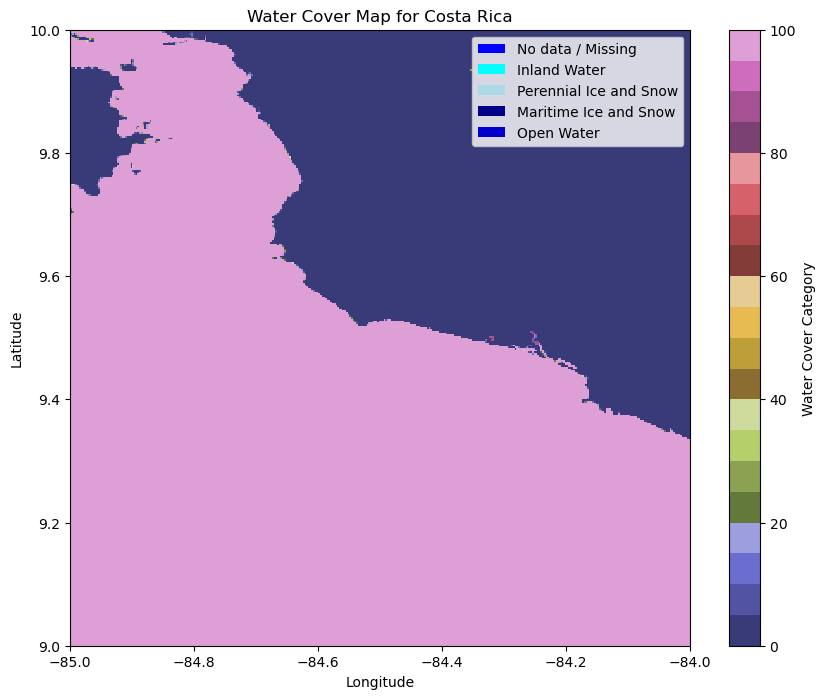

In [65]:
# Define the latitude and longitude bounds for Costa Rica
lat_min, lat_max = 9, 10
lon_min, lon_max = -85, -84

# Subset the data using the .sel() method in xarray with adjusted latitude bounds
subset_data = dataset.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Replace 'LAND' with the actual variable name you want to subset
variable_name = 'WATER'
variable = subset_data[variable_name]

# Map water cover categories to specific colors
color_map = {
    0: 'blue',    # No data / Missing
    1: 'cyan',    # Inland Water
    2: 'lightblue',  # Perennial Ice and Snow
    3: 'darkblue',  # Maritime Ice and Snow
    4: 'mediumblue', # Open Water
    # Add more mappings for other water cover categories as needed
}

# Create a color-coded plot using pcolormesh
plt.figure(figsize=(10, 8))
plt.pcolormesh(variable.lon, variable.lat, variable[0], cmap='tab20b', vmin=0, vmax=100, shading='auto')
plt.title('Water Cover Map for Costa Rica')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a custom legend for water cover categories
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc=color_map[key]) for key in color_map]
water_cover_labels = ['No data / Missing', 'Inland Water', 'Perennial Ice and Snow', 'Maritime Ice and Snow', 'Open Water']
# Add more labels for other water cover categories as needed
plt.legend(legend_handles, water_cover_labels)

# Add a color bar to indicate the legend
cbar = plt.colorbar()
cbar.set_label('Water Cover Category')

plt.show()


In [66]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

def download_and_combine_years(base_url, years, variable_name, lat_range, lon_range):
    combined_data = []  # List to store the data for each year

    for year in years:
        # Generate the URL for the specific year
        url = f'{base_url}{year}-v2.0.8.nc'
        
        # Open the dataset using xarray
        dataset = xr.open_dataset(url)

        # Subset the data using the .sel() method in xarray with adjusted latitude and longitude bounds
        subset_data = dataset.sel(lat=slice(lat_range[1], lat_range[0]), lon=slice(lon_range[0], lon_range[1]))

        # Replace 'WATER' with the actual variable name for water cover
        variable = subset_data[variable_name]

        # Append the selected variable data for the current year to the list
        combined_data.append(variable)

    # Concatenate the data for all years along the time dimension
    combined_data = xr.concat(combined_data, dim='time')

    return combined_data


<xarray.DataArray 'WATER' (time: 29, lat: 360, lon: 360)>
array([[[100, 100, 100, ...,   0,   0,   0],
        [100, 100, 100, ...,   0,   0,   0],
        [  8,  16,   1, ...,   0,   0,   0],
        ...,
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100]],

       [[100, 100, 100, ...,   0,   0,   0],
        [100, 100, 100, ...,   0,   0,   0],
        [  8,  16,   1, ...,   0,   0,   0],
        ...,
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100]],

       [[100, 100, 100, ...,   0,   0,   0],
        [100, 100, 100, ...,   0,   0,   0],
        [  8,  16,   1, ...,   0,   0,   0],
        ...,
...
        ...,
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100],
        [100, 100, 100, ..., 100, 100, 100]],

       [[100, 100, 100, ...,   0,   0,   0],
        [100, 100, 100, .

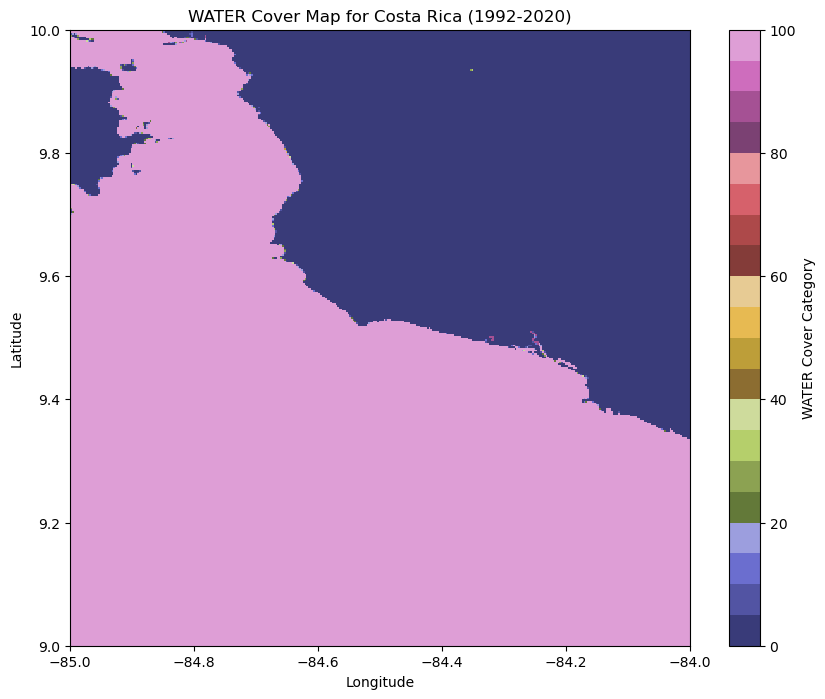

In [67]:
# Define the base URL for the dataset
base_url = 'https://dap.ceda.ac.uk/thredds/dodsC/neodc/esacci/land_cover/data/pft/v2.0.8/ESACCI-LC-L4-PFT-Map-300m-P1Y-'

# Define the years you want to download (1992 to 2020)
years = [str(year) for year in range(1992, 2021)]

# Define the latitude and longitude bounds for Costa Rica
lat_range = (9, 10)
lon_range = (-85, -84)

# Specify the variable name you want to combine (e.g., 'WATER')
variable_name = 'WATER'

# Download and combine the data for the selected years and variable
combined_data = download_and_combine_years(base_url, years, variable_name, lat_range, lon_range)

# Print the combined data information
print(combined_data)

# Export the combined data as a new netCDF file
output_filename = f'../../data/ESA-CCI-PFT/raw/ESA-CCI-PFT_1992-2020_{variable_name}.nc'
combined_data.to_netcdf(output_filename)

In [ ]:
# Plot the combined data for Costa Rica
plt.figure(figsize=(10, 8))
plt.pcolormesh(combined_data.lon, combined_data.lat, combined_data[0], cmap='tab20b', vmin=0, vmax=100, shading='auto')
plt.title(f'{variable_name} Cover Map for Costa Rica (1992-2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a color bar to indicate the legend
cbar = plt.colorbar()
cbar.set_label(f'{variable_name} Cover Category')

plt.show()